# Strategy Analysis with **Pandas TA** and AI/ML
* This is a **Work in Progress** and subject to change!
* Contributions are welcome and accepted!
* Examples below are for **educational purposes only**.
* **NOTE:** The **watchlist** module is independent of Pandas TA Classic. To easily use it, copy it from your local pandas_ta_classic installation directory into your project directory.

### Required Packages
##### Uncomment the packages you need to install or are missing

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install mplfinance
#!pip install pandas-datareader
#!pip install requests_cache
#!pip install tqdm
#!pip install alphaVantage-api # Required for Watchlist

In [2]:
%pylab inline
import datetime as dt
import random as rnd
from sys import float_info as sflt

from tqdm import tqdm

import numpy as np
import pandas as pd

pd.set_option("max_rows", 100)
pd.set_option("max_columns", 20)

import mplfinance as mpf
import pandas_ta_classic as ta

from tqdm.notebook import trange, tqdm

from watchlist import (
    colors,
    Watchlist,
)  # Is this failing? If so, copy it locally. See above.

print(f"Numpy v{np.__version__}")
print(f"Pandas v{pd.__version__}")
print(f"mplfinance v{mpf.__version__}")
print(
    f"\nPandas TA Classic v{ta.version}\nTo install the Latest Version:\n$ pip install pandas-ta-classic\n"
)
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib
Numpy v1.20.2
Pandas v1.2.4
mplfinance v0.12.7a12

Pandas TA v0.2.89b0
To install the Latest Version:
$ pip install pandas-ta-classic



### MISC Function(s)

In [3]:
def recent_bars(df, tf: str = "1y"):
    # All Data: 0, Last Four Years: 0.25, Last Two Years: 0.5, This Year: 1, Last Half Year: 2, Last Quarter: 4
    yearly_divisor = {
        "all": 0,
        "10y": 0.1,
        "5y": 0.2,
        "4y": 0.25,
        "3y": 1.0 / 3,
        "2y": 0.5,
        "1y": 1,
        "6mo": 2,
        "3mo": 4,
    }
    yd = yearly_divisor[tf] if tf in yearly_divisor.keys() else 0
    return int(ta.RATE["TRADING_DAYS_PER_YEAR"] / yd) if yd > 0 else df.shape[0]

## Data Collection

In [4]:
tf = "D"
tickers = ["SPY", "QQQ", "AAPL", "TSLA", "BTC-USD"]
watch = Watchlist(tickers, tf=tf, ds_name="yahoo", timed=True)
# watch.strategy = ta.CommonStrategy # If you have a Custom Strategy, you can use it here.
watch.load(tickers, analyze=True, verbose=False)

[!] Loading All: SPY, QQQ, AAPL, TSLA, BTC-USD
[+] Downloading[yahoo]: SPY[D]
[+] Saving: /Users/kj/av_data/SPY_D.csv
[i] Runtime: 583.3476 ms (0.5833 s)
[+] Downloading[yahoo]: QQQ[D]
[+] Saving: /Users/kj/av_data/QQQ_D.csv
[i] Runtime: 493.0341 ms (0.4930 s)
[+] Downloading[yahoo]: AAPL[D]
[+] Saving: /Users/kj/av_data/AAPL_D.csv
[i] Runtime: 495.5222 ms (0.4955 s)
[+] Downloading[yahoo]: TSLA[D]
[+] Saving: /Users/kj/av_data/TSLA_D.csv
[i] Runtime: 468.0090 ms (0.4680 s)
[+] Downloading[yahoo]: BTC-USD[D]
[+] Saving: /Users/kj/av_data/BTC-USD_D.csv
[i] Runtime: 481.1203 ms (0.4811 s)


# Asset Selection

In [5]:
ticker = tickers[0]  # change tickers by changing the index
print(
    f"{ticker} {watch.data[ticker].shape}\nColumns: {', '.join(list(watch.data[ticker].columns))}"
)

SPY (7149, 12)
Columns: open, high, low, close, volume, dividends, split, SMA_10, SMA_20, SMA_50, SMA_200, VOL_SMA_20


### Trim it

In [6]:
duration = "1y"
asset = watch.data[ticker]
recent = recent_bars(asset, duration)
asset.columns = asset.columns.str.lower()
asset.drop(columns=["dividends", "split"], errors="ignore", inplace=True)
asset = asset.copy().tail(recent)
asset

open        high         low       close     volume  \
date                                                                    
2020-06-19  310.572014  310.779600  303.019496  305.105347  135549600   
2020-06-22  304.462768  307.487721  303.236978  307.062653   74649400   
2020-06-23  309.899768  310.898211  308.041294  308.476257   68471200   
2020-06-24  306.291601  306.953942  298.640252  300.607452  132813500   
2020-06-25  299.994539  304.116796  297.829618  303.830109   89468000   
...                ...         ...         ...         ...        ...   
2021-06-14  424.429993  425.369995  423.100006  425.260010   42358500   
2021-06-15  425.420013  425.459991  423.540009  424.480011   51508500   
2021-06-16  424.630005  424.869995  419.920013  422.109985   80386100   
2021-06-17  421.670013  423.019989  419.320007  421.970001   90949700   
2021-06-18  417.089996  417.829987  414.700012  414.920013  118573500   

                sma_10      sma_20      sma_50     sma_200   vol_sma_20  
date                                                                     
2020-06-19  307.199380  304.275848  290.230250  294.865111  106968315.0  
2020-06-22  306.095767  305.090134  290.895322  294.957188  107502875.0  
2020-06-23  305.370712  305.795975  291.638665  295.055219  106478865.0  
2020-06-24  304.034952  305.889386  292.064598  295.113179  107878670.0  
2020-06-25  304.831430  306.171487  292.673680  295.187592  107831810.0  
...                ...         ...         ...         ...          ...  
2021-06-14  422.066998  419.250999  416.214198  376.217046   57830915.0  
2021-06-15  422.547998  419.699001  416.576599  376.617742   57149880.0  
2021-06-16  422.725998  420.207500  416.896398  376.995467   58178675.0  
2021-06-17  423.045999  420.763000  417.203998  377.378769   57402805.0  
2021-06-18  422.278000  420.745001  417.331999  377.710559   59430370.0  

[252 rows x 10 columns]

# Trend Creation
A **Trend** is the result of some calculation or condition of one or more indicators. For simplicity, a _Trend_ is either ```True``` or ```1``` and _No Trend_ is ```False``` or ```0```. Using the **Hello World** of Trends, the **Golden/Death Cross**, it's Trend is _Long_ when ```long = ma(close, 50) > ma(close, 200) ``` and _Short_ when ```short = ma(close, 50) < ma(close, 200) ```. 

In [7]:
# Example Long Trends
# long = ta.sma(asset.close, 50) > ta.sma(asset.close, 200) # SMA(50) > SMA(200) "Golden/Death Cross"
# long = ta.sma(asset.close, 10) > ta.sma(asset.close, 20) # SMA(10) > SMA(20)
long = ta.ema(asset.close, 8) > ta.ema(asset.close, 21)  # EMA(8) > EMA(21)
# long = ta.increasing(ta.ema(asset.close, 50))
# long = ta.macd(asset.close).iloc[:,1] > 0 # MACD Histogram is positive
# long = ta.amat(asset.close, 50, 200).AMATe_LR_2  # Long Run of AMAT(50, 200) with lookback of 2 bars

# long &= ta.increasing(ta.ema(asset.close, 50), 2) # Uncomment for further long restrictions, in this case when EMA(50) is increasing/sloping upwards
# long = 1 - long # uncomment to create a short signal of the trend

asset.ta.ema(length=8, sma=False, append=True)
asset.ta.ema(length=21, sma=False, append=True)
asset.ta.ema(length=50, sma=False, append=True)
asset.ta.percent_return(append=True)
print("TA Columns Added:")
asset[asset.columns[5:]].tail()

TA Columns Added:


sma_10      sma_20      sma_50     sma_200  vol_sma_20  \
date                                                                     
2021-06-14  422.066998  419.250999  416.214198  376.217046  57830915.0   
2021-06-15  422.547998  419.699001  416.576599  376.617742  57149880.0   
2021-06-16  422.725998  420.207500  416.896398  376.995467  58178675.0   
2021-06-17  423.045999  420.763000  417.203998  377.378769  57402805.0   
2021-06-18  422.278000  420.745001  417.331999  377.710559  59430370.0   

                 EMA_8      EMA_21      EMA_50  PCTRET_1  
date                                                      
2021-06-14  422.800724  419.948691  413.793995  0.002239  
2021-06-15  423.173899  420.360629  414.213054 -0.001834  
2021-06-16  422.937474  420.519661  414.522738 -0.005583  
2021-06-17  422.722480  420.651510  414.814787 -0.000332  
2021-06-18  420.988598  420.130465  414.818914 -0.016707

### **Trend Signals** 
Given a _Trend_, **Trend Signals** returns the _Trend_, _Trades_, _Entries_ and _Exits_ as boolean integers. When ```asbool=True```, it returns _Trends_, _Entries_ and _Exits_ as boolean values which is helpful when combined with the [**vectorbt**](https://github.com/polakowo/vectorbt) backtesting package.

In [8]:
trendy = asset.ta.tsignals(long, asbool=False, append=True)
trendy.tail()

TS_Trends  TS_Trades  TS_Entries  TS_Exits
date                                                  
2021-06-14          1          0           0         0
2021-06-15          1          0           0         0
2021-06-16          1          0           0         0
2021-06-17          1          0           0         0
2021-06-18          1          0           0         0

### Trend Entries & Exits & Trade Table
This is a simple way to reduce the Asset DataFrame to a Trade Table with Dates, Signals, and Entries and Exits. Gives you an idea what to expect before running through a backtester such as [**vectorbt**](https://github.com/polakowo/vectorbt).

In [9]:
entries = trendy.TS_Entries * asset.close
entries = entries[~np.isclose(entries, 0)]
entries.dropna(inplace=True)
entries.name = "Entry"

exits = trendy.TS_Exits * asset.close
exits = exits[~np.isclose(exits, 0)]
exits.dropna(inplace=True)
exits.name = "Exit"

total_trades = trendy.TS_Trades.abs().sum()
rt_trades = int(trendy.TS_Trades.abs().sum() // 2)

all_trades = trendy.TS_Trades.copy().fillna(0)
all_trades = all_trades[all_trades != 0]

trades = pd.DataFrame({"Signal": all_trades, entries.name: entries, exits.name: exits})

# Show some stats if there is an active trade (when there is an odd number of round trip trades)
if total_trades % 2 != 0:
    unrealized_pnl = asset.close.iloc[-1] - entries.iloc[-1]
    unrealized_pnl_pct_change = 100 * ((asset.close.iloc[-1] / entries.iloc[-1]) - 1)
    print("Current Trade:")
    print(f"Price Entry | Last:\t{entries.iloc[-1]:.4f} | {asset.close.iloc[-1]:.4f}")
    print(
        f"Unrealized PnL | %:\t{unrealized_pnl:.4f} | {unrealized_pnl_pct_change:.4f}%"
    )
print(f"\nTrades Total | Round Trip:\t{total_trades} | {rt_trades}")
print(f"Trade Coverage: {100 * asset.TS_Trends.sum() / asset.shape[0]:.2f}%")

trades

Current Trade:
Price Entry | Last:	415.2800 | 414.9200
Unrealized PnL | %:	-0.3600 | -0.0867%

Trades Total | Round Trip:	9 | 4
Trade Coverage: 80.95%


Signal       Entry        Exit
date                                      
2020-07-20       1  320.605774         NaN
2020-09-11      -1         NaN  330.234192
2020-10-05       1  337.213409         NaN
2020-10-28      -1         NaN  324.211609
2020-11-05       1  347.614868         NaN
2021-03-03      -1         NaN  380.174835
2021-03-10       1  388.308197         NaN
2021-05-19      -1         NaN  410.859985
2021-05-20       1  415.279999         NaN

# Visualization

### Chart Display Strings

In [10]:
extime = ta.get_time(to_string=True)
first_date, last_date = asset.index[0], asset.index[-1]
f_date = (
    f"{first_date.day_name()} {first_date.month}-{first_date.day}-{first_date.year}"
)
l_date = f"{last_date.day_name()} {last_date.month}-{last_date.day}-{last_date.year}"
last_ohlcv = f"Last OHLCV: ({asset.iloc[-1].open:.4f}, {asset.iloc[-1].high:.4f}, {asset.iloc[-1].low:.4f}, {asset.iloc[-1].close:.4f}, {int(asset.iloc[-1].volume)})"
ptitle = f"\n{ticker} [{tf} for {duration}({recent} bars)] from {f_date} to {l_date}\n{last_ohlcv}\n{extime}"

### Trade Chart

<AxesSubplot:title={'center':'\nSPY [D for 1y(252 bars)] from Friday 6-19-2020 to Friday 6-18-2021\nLast OHLCV: (417.0900, 417.8300, 414.7000, 414.9200, 118573500)\nSaturday June 19, 2021, NYSE: 8:06:33, Local: 12:06:33 PDT, Day 170/365 (47.00%)'}, xlabel='date'>

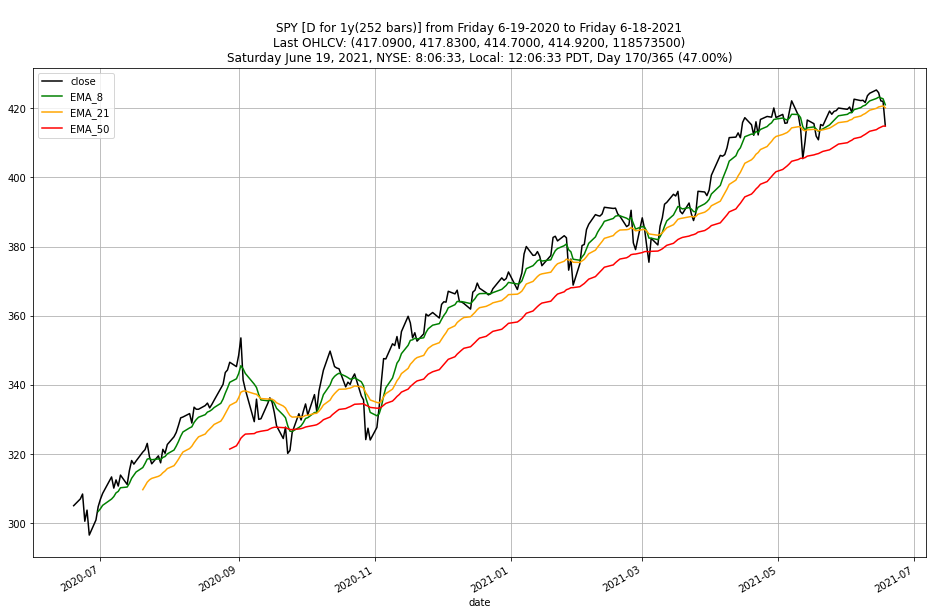

In [11]:
# chart = asset["close"] #asset[["close", "SMA_10", "SMA_20", "SMA_50", "SMA_200"]]
# chart = asset[["close", "SMA_10", "SMA_20"]]
chart = asset[["close", "EMA_8", "EMA_21", "EMA_50"]]
chart.plot(figsize=(16, 10), color=colors("BkGrOrRd"), title=ptitle, grid=True)

### Long and Short Trends
**Trends** are either a _Trend_ (```1```) or _No Trend_ (```0```) depending on the **Trend** passed into ***Trend Signals**

<AxesSubplot:xlabel='date'>

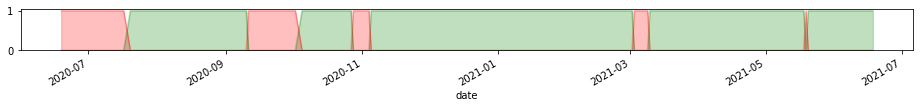

In [12]:
long_trend = trendy.TS_Trends
short_trend = 1 - long_trend

long_trend.plot(
    figsize=(16, 0.85), kind="area", stacked=True, color=colors()[0], alpha=0.25
)  # Green Area
short_trend.plot(
    figsize=(16, 0.85), kind="area", stacked=True, color=colors()[1], alpha=0.25
)  # Red Area

### Trades or Trade Signals
The **Trades** are either _Enter_ (```1```) or _Exit_ (```-1```) or _No Position/Action_ (```0```). These are based on the **Trend** passed into **Trend Signals** whether they are _Long_ or _Short_ Trends.

<AxesSubplot:xlabel='date'>

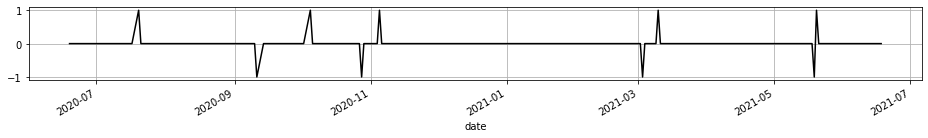

In [13]:
trendy.TS_Trades.plot(figsize=(16, 1.5), color=colors("BkBl")[0], grid=True)

### Active Returns
**Active Returns** are returns made during the course of the _Trend_. They are simply the product of the returns and the _Trend_

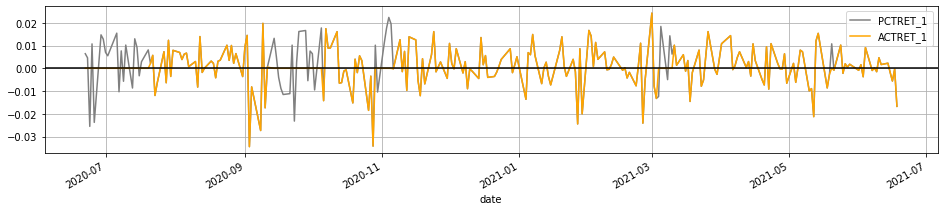

In [14]:
asset["ACTRET_1"] = trendy.TS_Trends.shift(1) * asset.PCTRET_1
asset[["PCTRET_1", "ACTRET_1"]].plot(
    figsize=(16, 3), color=colors("GyOr"), alpha=1, grid=True
).axhline(0, color="black")

### Buy and Hold Returns (*PCTRET_1*) vs. Cum. Active Returns (*ACTRET_1*)

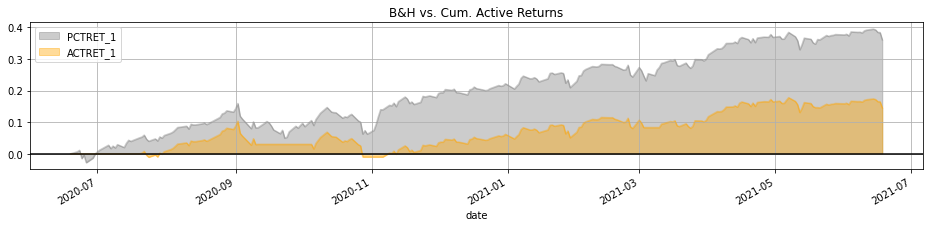

In [15]:
((asset[["PCTRET_1", "ACTRET_1"]] + 1).cumprod() - 1).plot(
    figsize=(16, 3),
    kind="area",
    stacked=False,
    color=colors("GyOr"),
    title="B&H vs. Cum. Active Returns",
    alpha=0.4,
    grid=True,
).axhline(0, color="black")

# Disclaimer
* All investments involve risk, and the past performance of a security, industry, sector, market, financial product, trading strategy, or individual’s trading does not guarantee future results or returns. Investors are fully responsible for any investment decisions they make. Such decisions should be based solely on an evaluation of their financial circumstances, investment objectives, risk tolerance, and liquidity needs.

* Any opinions, news, research, analyses, prices, or other information offered is provided as general market commentary, and does not constitute investment advice. I will not accept liability for any loss or damage, including without limitation any loss of profit, which may arise directly or indirectly from use of or reliance on such information.